In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]

In [4]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [5]:
dataset.shape

(768, 9)

In [6]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
common_age = dataset['Age'].value_counts()

In [8]:
common_age.head()

Age
22    72
21    63
25    48
24    46
23    38
Name: count, dtype: int64

In [9]:
# check if any null value is present
dataset.isnull().values.any()

False

In [10]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# Checking number of peoples in the datset that are diabetic and non-diabetic
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Here, 0 --> Non-Diabetic 1 --> Diabetic

In [12]:
diabetes_true_count = len(dataset.loc[dataset['Outcome'] == True])
diabetes_false_count = len(dataset.loc[dataset['Outcome'] == False])

In [13]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [14]:
#X = dataset.drop(columns='Outcome',axis=1)
#Y = dataset['Outcome']

In [15]:
from sklearn.model_selection import train_test_split
#feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
#predicted_class = ['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
#X = dataset[feature_columns].values
#Y = dataset[predicted_class].values


#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state=10)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
#Check how many other missing(zero) values
#print("total number of rows : {0}".format(len(dataset)))
#print("number of rows missing Glucose: {0}".format(len(dataset.loc[dataset['Glucose'] == 0])))
#print("number of rows missing BloodPressure: {0}".format(len(dataset.loc[dataset['BloodPressure'] == 0])))
#print("number of rows missing SkinThickness: {0}".format(len(dataset.loc[dataset['SkinThickness'] == 0])))
#print("number of rows missing Insulin: {0}".format(len(dataset.loc[dataset['Insulin'] == 0])))
#print("number of rows missing BMI: {0}".format(len(dataset.loc[dataset['BMI'] == 0])))
#print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(dataset.loc[dataset['DiabetesPedigreeFunction'] == 0])))
#print("number of rows missing Age: {0}".format(len(dataset.loc[dataset['Age'] == 0])))

In [19]:
#from sklearn.preprocessing import Imputer
#from sklearn.impute import SimpleImputer 
#fill_values = SimpleImputer(missing_values=0, strategy="mean")

##X_test = fill_values.fit_transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [21]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.805


In [22]:
input_data = (1,115,70,30,96,34.6,0.529,7)

# changing to numpy array
data_changed = np.asarray(input_data)

# Reshaping as we are predicting for one instance only
data_reshaped = data_changed.reshape(1,-1)

#standarising the input data
std_data = sc.transform(data_reshaped)
print(std_data)

#predicting output 
prediction = random_forest_model.predict(std_data)
if prediction == 1:
  print('The person is Diabetic')
else:
  print('The person is Non-Diabetic')

[[-0.8354355  -0.18549586  0.03960159  0.58457246  0.11808927  0.3026523
   0.18781421 -2.2150278 ]]
The person is Non-Diabetic


c:\Users\Sam Baqri\Newfolder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
from sklearn.linear_model import LogisticRegression  
logistic_regression_model= LogisticRegression()  
logistic_regression_model.fit(X_train, y_train)  

LogisticRegression()

In [24]:
predict_train_data = logistic_regression_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.825


In [25]:
input_data = (1,73,50,10,0,23,0.248,21)

# changing to numpy array
data_changed = np.asarray(input_data)

# Reshaping as we are predicting for one instance only
data_reshaped = data_changed.reshape(1,-1)

#standarising the input data
std_data = sc.transform(data_reshaped)
print(std_data)

#predicting output 
prediction = logistic_regression_model.predict(std_data)
if prediction == 1:
  print('The person is Diabetic')
else:
  print('The person is Non-Diabetic')

[[-0.8354355  -1.50692331 -0.98420365 -0.66235299 -0.69965674 -1.16424852
  -0.65620258 -1.04898095]]
The person is Non-Diabetic


c:\Users\Sam Baqri\Newfolder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:
from sklearn import svm
svm_model = svm.SVC(kernel='linear')

In [27]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [28]:
predict_train_data = svm_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.825


In [29]:
input_data = (1,73,50,10,0,23,0.248,21)
#0=1,73,50,10,0,23,0.248,21
#1=7,187,68,39,304,37.7,0.254,41
# changing to numpy array
data_changed = np.asarray(input_data)

# Reshaping as we are predicting for one instance only
data_reshaped = data_changed.reshape(1,-1)

#standarising the input data
std_data = sc.transform(data_reshaped)
print(std_data)

#predicting output 
prediction = svm_model.predict(std_data)
if prediction == 1:
  print('The person is Diabetic')
else:
  print('The person is Non-Diabetic')

[[-0.8354355  -1.50692331 -0.98420365 -0.66235299 -0.69965674 -1.16424852
  -0.65620258 -1.04898095]]
The person is Non-Diabetic


c:\Users\Sam Baqri\Newfolder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
import sys
print(sys.executable)

!{sys.executable} -m pip install tensorflow==2.15.0 keras==2.15.0

c:\Users\Sam Baqri\Newfolder\python.exe


'c:\Users\Sam' is not recognized as an internal or external command,
operable program or batch file.


In [31]:
%pip install keras==2.15.0

Note: you may need to restart the kernel to use updated packages.


In [32]:
%pip install tensorflow==2.15.0

Note: you may need to restart the kernel to use updated packages.


In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [34]:
classifier = Sequential()

In [35]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 5, kernel_initializer =  'he_uniform',activation='relu',input_dim = 8))
# Adding the second hidden layer
classifier.add(Dense(units =5, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [36]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100




42/42 [==============================] - 2s 13ms/step - loss: 1.0906 - accuracy: 0.4039 - val_loss: 1.1288 - val_accuracy: 0.3744
Epoch 2/100
42/42 [==============================] - 2s 13ms/step - loss: 1.0906 - accuracy: 0.4039 - val_loss: 1.1288 - val_accuracy: 0.3744
Epoch 2/100
42/42 [==============================] - 0s 4ms/step - loss: 0.9435 - accuracy: 0.4599 - val_loss: 0.9925 - val_accuracy: 0.3892
Epoch 3/100
42/42 [==============================] - 0s 4ms/step - loss: 0.9435 - accuracy: 0.4599 - val_loss: 0.9925 - val_accuracy: 0.3892
Epoch 3/100
42/42 [==============================] - 0s 4ms/step - loss: 0.8326 - accuracy: 0.4964 - val_loss: 0.8821 - val_accuracy: 0.4828
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 0.8326 - accuracy: 0.4964 - val_loss: 0.8821 - val_accuracy: 0.4828
Epoch 4/100
42/42 [==============================] - 0s 6ms/step - loss: 0.7519 - accuracy: 0.5523 - val_loss: 0.8142 - val_accuracy: 0.5172
Epoch 5

In [37]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


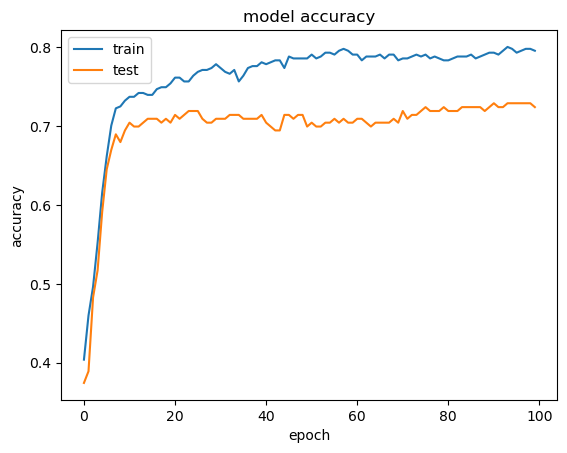

In [38]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

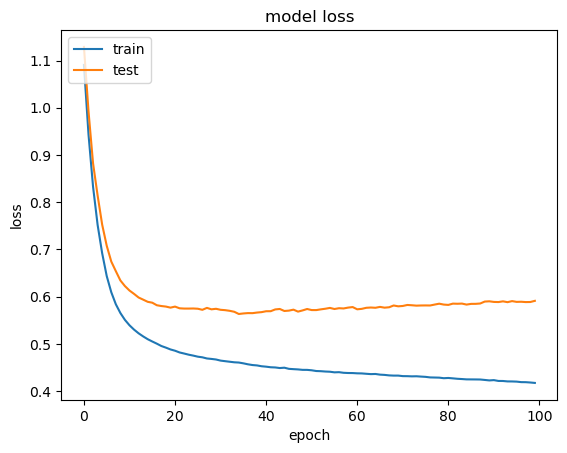

In [39]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

5/5 [==============================] - 0s 3ms/step


array([[ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [

In [41]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.7597402597402597

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
user_input = []
for feature in X.columns:
    value = float(input(f"Enter {feature}: "))
    user_input.append(value)

user_input_scaled = scaler.transform([user_input])

In [50]:
prediction = user_input_scaled

if prediction[0][0] >= 0.5:
    result = "Diabetic"
else:
    result = "Non-Diabetic"

print("Prediction:", result)

Prediction: Diabetic


In [46]:
#pickel
import pickle

pickle.dump(svm_model,open('Final2.pkl' , 'wb'))
pickle.load(open('Final2.pkl' , 'rb'))

SVC(kernel='linear')

In [52]:
import pickle
pickle.dump(sc, open('scaler.pkl', 'wb'))  # Save the fitted scaler as scaler.pkl